In [1]:
import json
from tqdm import tqdm
import eunomia

C:\Users\mehra\anaconda3\envs\elm\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
predictions_list = []
for i in tqdm(range(1,112)):
    results_index_path = f"../Data/faiss/results/results_paper_{i}.json"
    with open(results_index_path, 'rb') as f:
        paper_result = json.load(f)
    predictions_list.append(paper_result)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 3590.16it/s]


In [3]:
predictions_list[1]

{'MOF-74': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'MOF-508b': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Zn-BDC-DABCO': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'HKUST-1': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Cr-MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Al-MIL-110': {'Predicted Stability': 'Not provided', 'Paper id': '2'}}

In [4]:
def parse_ground_truth():
    import pandas as pd
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel('../Result/Excel/Standard_Criteria_Binary.xlsx', engine='openpyxl')
    # Replace column names with corrected names
    df.columns = df.columns.str.replace('_x0002_', ' ')

    df = df[['MOF contained', 'True Water Stability', 'Reference #']]
    df = df.rename(columns={'MOF contained': 'MOF name', 'True Water Stability': 'Ground-truth Stability',
                            'Reference #': 'Paper id'})
    ground_truth_list = []
    for _, group in df.groupby("Paper id"):
        mofs = {
            row["MOF name"]: {
                "Ground-truth Stability": row["Ground-truth Stability"],
                "Paper id": str(row["Paper id"])
            }
            for _, row in group.iterrows()
        }
        ground_truth_list.append(mofs)
    return ground_truth_list

ground_truth_list = parse_ground_truth()

In [5]:
# import pandas as pd

# # Read the Excel file into a pandas DataFrame
# df = pd.read_excel('../Result/Excel/Standard_Criteria_Binary.xlsx', engine='openpyxl')
# # Replace column names with corrected names
# df.columns = df.columns.str.replace('_x0002_', ' ')

# df = df[['MOF contained', 'True Water Stability', 'Reference #']]
# df = df.rename(columns={'MOF contained': 'MOF name', 'True Water Stability': 'Ground-truth Stability',
#                       'Reference #': 'Paper id'})

# # ground_truth_dict = df.to_dict('index')
# # ground_truth_dict = {f'MOF {k+1}': v for k, v in ground_truth_dict.items()}

# # for mof in stability_dict.values():
# #     mof['Predicted Stability'] = 'Not provided'
    
# # df

In [9]:
paper_id = 1
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(prediction_dict)
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=90)

{'MOF-74': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'MOF-508b': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Zn-BDC-DABCO': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'HKUST-1': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Cr-MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Al-MIL-110': {'Predicted Stability': 'Not provided', 'Paper id': '2'}}
{'MIL-101(Cr)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'ZIF-8': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'MIL-53(Al)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'HKUST-1': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'Zn-MOF-74': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MIL-110(Al)': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-5': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-508': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-69C': {'Ground-truth Stability': 'Unstable', 'Paper

({'MOF-508b': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'HKUST-1': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'Cr-MIL-101': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Stable'},
  'Al-MIL-110': {'Predicted Stability': 'Not provided',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'}},
 [('MOF-508b', 'MOF-508'),
  ('HKUST-1', 'HKUST-1'),
  ('Cr-MIL-101', 'MIL-101(Cr)'),
  ('Al-MIL-110', 'MIL-110(Al)')])

In [10]:
paper_id = 100
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(f'{prediction_dict}\n')
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=90)

{'1': {'Predicted Stability': 'Unstable', 'Paper id': '101'}, '2': {'Predicted Stability': 'Unstable', 'Paper id': '101'}}

{'Ni-DMOF': {'Ground-truth Stability': 'Unstable', 'Paper id': '101'}}


({}, [])

In [30]:
paper_id = 1
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(f'{prediction_dict}\n')
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=70)

{'MOF-74': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'MOF-508b': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Zn-BDC-DABCO': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'HKUST-1': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Cr-MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Al-MIL-110': {'Predicted Stability': 'Not provided', 'Paper id': '2'}}

{'MIL-101(Cr)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'ZIF-8': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'MIL-53(Al)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'HKUST-1': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'Zn-MOF-74': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MIL-110(Al)': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-5': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-508': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-69C': {'Ground-truth Stability': 'Unstable', 'Pape

({'MOF-74': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'MOF-508b': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'HKUST-1': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'Cr-MIL-101': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Stable'},
  'Al-MIL-110': {'Predicted Stability': 'Not provided',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'}},
 [('MOF-74', 'Zn-MOF-74'),
  ('MOF-508b', 'MOF-508'),
  ('HKUST-1', 'HKUST-1'),
  ('Cr-MIL-101', 'MIL-101(Cr)'),
  ('Al-MIL-110', 'MIL-110(Al)')])

In [31]:
def eval_single_paper_results (combined_dict):
    y = []
    y_hat = []
    not_provided_count = 0
    for k, v in combined_dict.items():
        if v['Predicted Stability'] != 'Not provided':
            if v['Ground-truth Stability'] == 'Stable':
                y.append(1)
            else:
                y.append(0)
            if v['Predicted Stability'] == 'Stable':
                y_hat.append(1)
            else:
                y_hat.append(0)
        else:
            not_provided_count += 1
    return y, y_hat, not_provided_count
        

In [49]:
combined_dict, matched_pairs = eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=60)

In [65]:
y_values = []
y_hat_values = []
not_provided_count_values = []
for i in tqdm(range(0,111)): 
    prediction_dict = predictions_list[i]
    ground_truth_dict = ground_truth_list[i]
    combined_dict, matched_pairs = eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=75)
    y, y_hat, not_provided_count = eval_single_paper_results(combined_dict)
    y_values.append(y)
    y_hat_values.append(y_hat)
    not_provided_count_values.append(not_provided_count)

y_values = [item for sublist in y_values for item in sublist]
y_hat_values = [item for sublist in y_hat_values for item in sublist]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 830.58it/s]


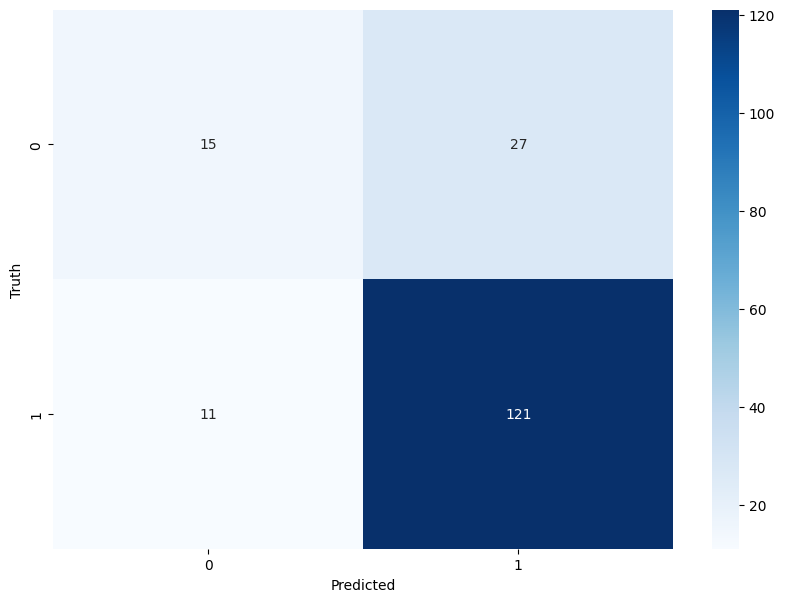

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion Matrix
cm = confusion_matrix(y_values, y_hat_values)

plt.figure(figsize=(10,7))

# Using seaborn to plot heatmap, annot=True to annotate the numbers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

Accuracy: 0.782


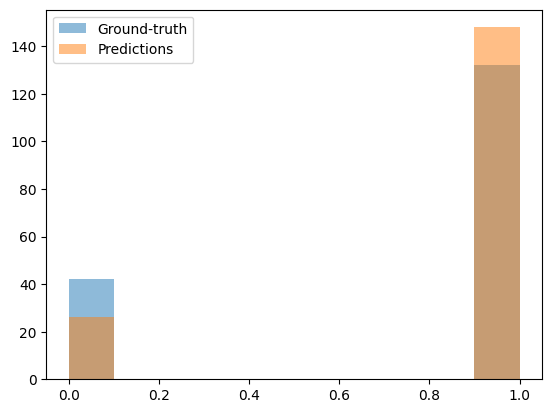

In [67]:
from sklearn.metrics import accuracy_score
# Calculate Accuracy
acc = accuracy_score(y_values, y_hat_values)

print(f"Accuracy: {acc:.03f}")

plt.hist(y_values, label='Ground-truth', alpha=0.5)
plt.hist(y_hat_values, label='Predictions', alpha=0.5)
plt.legend()

In [16]:
not_provided_count = 0

for key in prediction_dict:
    if predictions_dict[key].get('Predicted Stability') == 'Not provided':
        not_provided_count += 1

print(not_provided_count)

NameError: name 'predictions_dict' is not defined

In [39]:
stability_dict

{'MOF 1': {'MOF name': 'Bio-MOF-14',
  'Ground-truth Stability': 'Stable',
  'Paper id': 1,
  'Predicted Stability': 'Not provided'},
 'MOF 2': {'MOF name': 'Bio-MOF-13',
  'Ground-truth Stability': 'Stable',
  'Paper id': 1,
  'Predicted Stability': 'Not provided'},
 'MOF 3': {'MOF name': 'Bio-MOF-12',
  'Ground-truth Stability': 'Unstable',
  'Paper id': 1,
  'Predicted Stability': 'Not provided'},
 'MOF 4': {'MOF name': 'Bio-MOF-11',
  'Ground-truth Stability': 'Unstable',
  'Paper id': 1,
  'Predicted Stability': 'Not provided'},
 'MOF 5': {'MOF name': 'MIL-101(Cr)',
  'Ground-truth Stability': 'Stable',
  'Paper id': 2,
  'Predicted Stability': 'Stable'},
 'MOF 6': {'MOF name': 'ZIF-8',
  'Ground-truth Stability': 'Stable',
  'Paper id': 2,
  'Predicted Stability': 'Not provided'},
 'MOF 7': {'MOF name': 'MIL-53(Al)',
  'Ground-truth Stability': 'Stable',
  'Paper id': 2,
  'Predicted Stability': 'Unstable'},
 'MOF 8': {'MOF name': 'HKUST-1',
  'Ground-truth Stability': 'Unstable'

In [21]:
ground_truth_dict

{'Pb2(PTPTP)2(H2O)2': {'Ground-truth Stability': 'Stable', 'Paper id': '24'},
 'Pb2(p-PDA)\n(PTPTP)2': {'Ground-truth Stability': 'Stable',
  'Paper id': '24'},
 'Pb4(o-PDA)2\n(PTPTP)2': {'Ground-truth Stability': 'Stable',
  'Paper id': '24'}}

In [25]:
ground_truth_list[0][]

{'Bio-MOF-14': {'Ground-truth Stability': 'Stable', 'Paper id': '1'},
 'Bio-MOF-13': {'Ground-truth Stability': 'Stable', 'Paper id': '1'},
 'Bio-MOF-12': {'Ground-truth Stability': 'Unstable', 'Paper id': '1'},
 'Bio-MOF-11': {'Ground-truth Stability': 'Unstable', 'Paper id': '1'}}

In [43]:
ground_truth_list[0].values()

dict_values([{'Ground-truth Stability': 'Stable', 'Paper id': '1'}, {'Ground-truth Stability': 'Stable', 'Paper id': '1'}, {'Ground-truth Stability': 'Unstable', 'Paper id': '1'}])

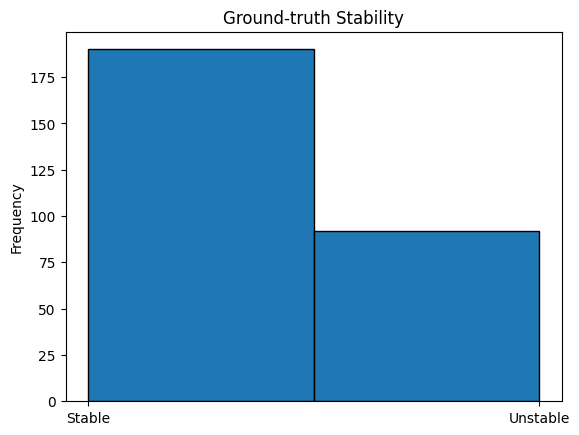

In [45]:
import matplotlib.pyplot as plt

# Extract Ground-truth Stability values
stability_values = [v['Ground-truth Stability'] for d in ground_truth_list for v in d.values()]

# Create histogram
plt.hist(stability_values, bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Ground-truth Stability')
plt.show()

In [8]:
# def merge_dictionaries(ground_truth_dict, predictions_dict):
#     # Convert dictionaries to dataframes and set 'MOF name' as index
#     df1 = pd.DataFrame(ground_truth_dict).T.set_index('MOF name')
#     df2 = pd.DataFrame(predictions_dict).T.set_index('MOF name')

#     # Merge dataframes
#     merged_df = df1.join(df2)

#     # Reset index and map index back to original dictionary keys
#     merged_df.reset_index(inplace=True)
#     merged_df.index = [f'MOF {i+1}' for i in range(len(merged_df))]

#     # Convert back to nested dictionary
#     merged_dict = merged_df.T.to_dict()

#     return merged_dict

# all_data = merge_dictionaries(ground_truth_dict, predictions_dict)

In [20]:
# Iterate through all items in ground_truth_dict
for gt_key, gt_value in stability_dict.items():
    # Iterate through all items in predictions_dict
    for pred_key, pred_value in predictions_dict.items():
        # Check if 'MOF name' values are the same
        if gt_value['MOF name'].lower() == pred_value['MOF name'].lower():  # the comparison is case insensitive
            # Update the 'Predicted Stability' value in ground_truth_dict
            gt_value['Predicted Stability'] = pred_value['Predicted Stability']




In [22]:
# Get list of MOF names in the ground truth dictionary
ground_truth_names = [value['MOF name'] for value in stability_dict.values()]

# Get list of MOF names in the predictions dictionary
predicted_names = [value['MOF name'] for value in predictions_dict.values()]

# Count non-matching names
non_matching_names = len(set(ground_truth_names) - set(predicted_names))

print(non_matching_names)

130


In [38]:
ground_truth_names[:30]

['Bio-MOF-14',
 'Bio-MOF-13',
 'Bio-MOF-12',
 'Bio-MOF-11',
 'MIL-101(Cr)',
 'ZIF-8',
 'MIL-53(Al)',
 'HKUST-1',
 'Zn-MOF-74',
 'MIL-110(Al)',
 'MOF-5',
 'MOF-508',
 'MOF-69C',
 'MIL-101(Cr)',
 'MIL-101\n-SO3H(Cr)',
 'MIL-101\n-NH2(Cr)',
 'MIL-101\n-NO2(Cr)',
 'MIL-101(Cr)',
 'ZIF-8',
 'MIL-69(Al)',
 'HKUST-1',
 'MIL-100(Fe)',
 'MIL-101(Cr)',
 'MIL-101(Cr)',
 'MIL-100(Fe)',
 'MIL-101(Cr)',
 'MIL-101(Cr)',
 'MIL-101(Cr)',
 'MIL-101\n-SO3H(Cr)',
 'MIL-96(Al)']

In [37]:
predicted_names[:30]

['MOF-11',
 'MOF-12',
 'MOF-13',
 'MOF-14',
 'MOF-69C',
 'MOF-5',
 'MOF-508B',
 'HKUST-1',
 'MOF-74',
 'MIL-101',
 'MIL-101-NH2',
 'MIL-101-SO3H',
 'HKUST-1',
 'ZIF-8',
 'MIL-101',
 'MIL-100(Fe)',
 'MIL-101',
 'MOF-177',
 'MOF-5',
 'MIL-101(Cr)',
 'MIL-100(Fe)',
 'MIL-101',
 'MIL-101',
 'MOF-5',
 'MOF-199',
 'MIL-100',
 'MIL-101',
 'MIL-101',
 'MIL-96(Al)',
 'ZIF-8']

In [24]:
set(ground_truth_names) - set(predicted_names)

{'Al(OH)(1,4-NDC)',
 'AlaZnOAc',
 'Bio-MOF-11',
 'Bio-MOF-12',
 'Bio-MOF-13',
 'Bio-MOF-14',
 'CAU-10-CH3',
 'CAU-10-H',
 'CAU-10-NH2',
 'CAU-10-NO2',
 'CAU-10-OCH3',
 'CAU-10-OH',
 'Cd(2,6-NDC)0.5 (PCA)',
 'Cd(L1)(Cl)(H2O)',
 'Cd(L2)(Cl)(H2O)',
 'Cd(L3)(Cl)(H2O)2',
 'Cd2(L2)2(Br)2 (H2O)3',
 'Co(L13)2',
 'Co-DMOF',
 'Co-MOF-74/\nCo-CPO-27/\nCo-DOBDC',
 'Cu-BTC/HKUST-1',
 'Cu-DMOF',
 'Cu-EBTC',
 'Cu-MBTC',
 'Cu2(TCMBT)\n(BPP)(OH)',
 'Cu2(TPTC-O- (ethyl))',
 'Cu2(TPTC-O-(n_x0002_hexyl))',
 'Cu2(TPTC-O-(n_x0002_propyl))',
 'Cu2(TPTC-O_x0002_methyl)',
 'DUT-67(Hf)',
 'DUT-67(Zr)',
 'DUT-68(Hf)',
 'DUT-68(Zr)',
 'DUT-69(Zr)',
 'H3(Cu4Cl)3-\n(BTTRI)8',
 'IRMOF-1-(CH3)2/\nMOF-5-(CH3)2',
 'IRMOF-1-CF3O/\nMOF-5-CF3O/\nBanasorb-22',
 'IRMOF-1-CH3/\nMOF-5-CH3',
 'IRMOF-1/MOF-5',
 'IRMOF-3/\nMOF-5-NH2',
 'MIL-101\n-NH2(Cr)',
 'MIL-101\n-NO2(Cr)',
 'MIL-101\n-SO3H(Cr)',
 'MIL-101-NH2(Cr)',
 'MIL-101-NO2(Cr)',
 'MIL-110 (Al)',
 'MIL-110(Al)',
 'MIL-125-NH2(Ti)',
 'MIL-140 A',
 'MIL-140 B',
 'MIL-140

In [22]:
y = []
y_hat = []
for k, v in ground_truth_dict.items():
    if v['Predicted Stability'] != 'Not provided':
        if v['Ground-truth Stability'] == 'Stable':
            y.append(1)
        else:
            y.append(0)
        if v['Predicted Stability'] == 'Stable':
            y_hat.append(1)
        else:
            y_hat.append(0)
    else:
        count


In [23]:
len(y)

70

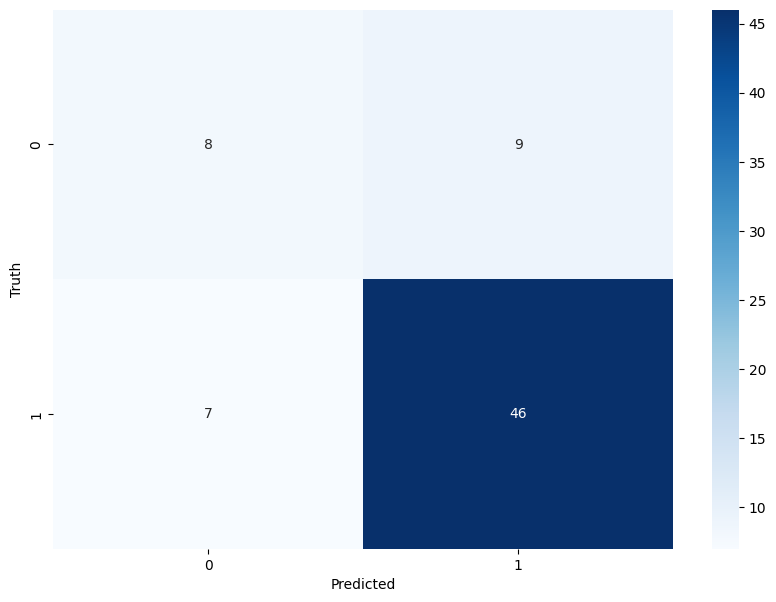

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion Matrix
cm = confusion_matrix(y, y_hat)

plt.figure(figsize=(10,7))

# Using seaborn to plot heatmap, annot=True to annotate the numbers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [25]:
from sklearn.metrics import accuracy_score
# Calculate Accuracy
acc = accuracy_score(y, y_hat)

print(f"Accuracy: {acc:.03f}")

plt.hist(y, label='Ground-truth', alpha=0.5)
plt.hist(y_hat, label='Predictions', alpha=0.5)
plt.legend()

Accuracy: 0.771


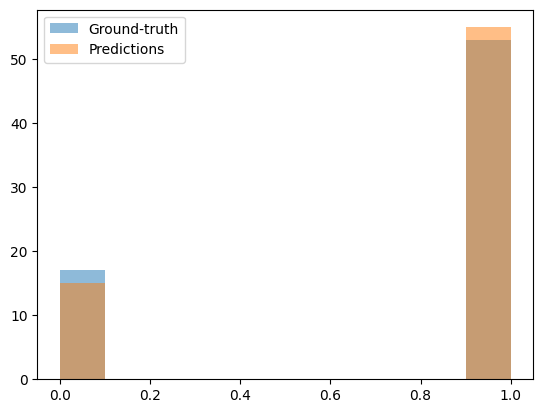